**提取数据**

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import sys
# sys.path.append(r'./StatLedger/module')
# from printtable import print_table

In [7]:
# large_metre_2019 = pd.read_excel(r'.\自来水数据\远传表原始数据\远传系统2019年大口径智能表水量（1月1日至2月25日）.xlsx')
# smart_metre_2019 = pd.read_excel(r'.\自来水数据\远传表原始数据\远传系统2019年小口径智能表水量（1月1日至2月24日）.xlsx')

In [8]:
large_metre_2020 = pd.read_excel(r'.\自来水数据\远传表原始数据\远传系统2020年大口径智能表水量（1月1日至2月25日）.xlsx')
smart_metre_2020 = pd.read_excel(r'.\自来水数据\远传表原始数据\远传系统2020年小口径智能表水量（1月1日至2月24日）.xlsx')

In [9]:
# large_metre_2019 = large_metre_2019 [:-1].drop_duplicates()
# smart_metre_2019 = smart_metre_2019 [:-1].drop_duplicates()
large_metre_2020 = large_metre_2020 [:-1].drop_duplicates()
smart_metre_2020 = smart_metre_2020 [:-1].drop_duplicates()

**修正远传系统用户编号格式**

In [10]:
# large_metre_2020['用户编号'] =  large_metre_2020['用户编号'].astype('int').astype('str').replace('0',np.nan).str.pad(10,fillchar='0')
large_metre_2020['用户编号'] = large_metre_2020['用户编号'].str[1:].str.pad(10,fillchar='0')

In [11]:
smart_metre_2020['用户编号'] = smart_metre_2020['用户编号'].str[1:].str.pad(10,fillchar='0')

In [12]:
large_metre_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9535 entries, 0 to 9534
Data columns (total 65 columns):
远传ID          9535 non-null float64
数据编号          9535 non-null float64
区册号           8255 non-null object
用户编号          9535 non-null object
用户名称          9365 non-null object
用途            5168 non-null object
性质            4940 non-null object
口径            9135 non-null object
数据编号.1        9535 non-null float64
2020-01-01    8026 non-null float64
2020-01-02    7698 non-null float64
2020-01-03    8469 non-null float64
2020-01-04    8668 non-null float64
2020-01-05    8709 non-null float64
2020-01-06    8947 non-null float64
2020-01-07    8964 non-null float64
2020-01-08    8976 non-null float64
2020-01-09    8982 non-null float64
2020-01-10    8976 non-null float64
2020-01-11    8969 non-null float64
2020-01-12    8964 non-null float64
2020-01-13    8980 non-null float64
2020-01-14    8979 non-null float64
2020-01-15    8977 non-null float64
2020-01-16    8842 non-null float64

In [13]:
smart_metre_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117355 entries, 0 to 117354
Data columns (total 66 columns):
远传ID          117355 non-null float64
数据编号          117355 non-null float64
区册号           117355 non-null object
用户编号          117355 non-null object
用户名称          117355 non-null object
用途            90 non-null object
性质            117355 non-null object
口径            117352 non-null float64
用户地址          117355 non-null object
数据编号.1        117355 non-null float64
2020-01-01    108196 non-null float64
2020-01-02    106747 non-null float64
2020-01-03    108050 non-null float64
2020-01-04    109349 non-null float64
2020-01-05    108950 non-null float64
2020-01-06    108540 non-null float64
2020-01-07    109705 non-null float64
2020-01-08    109813 non-null float64
2020-01-09    108966 non-null float64
2020-01-10    110654 non-null float64
2020-01-11    109468 non-null float64
2020-01-12    98907 non-null float64
2020-01-13    95167 non-null float64
2020-01-14    75741 non-nul

In [14]:
#提取用户名称
import re 

large_metre_2020['用户名称']=large_metre_2020.apply(lambda x: re.sub(r'\d{10}','',str(x['用户名称'])),axis=1)
smart_metre_2020['用户名称']=smart_metre_2020.apply(lambda x: re.sub(r'\d{10}','',str(x['用户名称'])),axis=1)

In [15]:
large_metre_2020['远传ID']=large_metre_2020['远传ID'].astype('int').astype('str')
smart_metre_2020['远传ID']=smart_metre_2020['远传ID'].astype('int').astype('str')

In [16]:

large_metre_2020['口径']

0       200
1       NaN
2       NaN
3       100
4        50
       ... 
9530    NaN
9531    NaN
9532    NaN
9533    NaN
9534    NaN
Name: 口径, Length: 9535, dtype: object

In [17]:
large_metre_2020[large_metre_2020[['远传ID','用户编号']].isnull().any(axis=1)]

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,数据编号.1,2020-01-01,...,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,合计


In [18]:
smart_metre_2020[smart_metre_2020[['远传ID','用户编号']].isnull().any(axis=1)]

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,用户地址,数据编号.1,...,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,合计


In [19]:
#大表同用户编号，远传ID情况
large_metre_2020[large_metre_2020.duplicated(['远传ID','用户编号'],keep=False)].sort_values('用户编号',ascending=False)

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,数据编号.1,2020-01-01,...,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,合计
2773,91830142,9.918301e+11,3105021500,0030187199,广东省广州市白云区金沙洲B3734F02.04地块,计费,NaN,100,9.918301e+11,85.800000,...,65.1,72.3,66.7,64.8,63.5,69.5,70.1,66.799999,68.300001,3961.800000
2788,91830142,9.918301e+11,3105021500,0030187199,白云区金沙洲保障房,计费,NaN,NaN,9.918301e+11,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3023,91830159,9.918302e+11,3075011900,0022002381,芳村龙溪路原高尔夫球场AF030614地块隽泷园一期,NaN,NaN,NaN,9.918302e+11,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3024,91830159,9.918302e+11,3075011900,0022002381,芳村龙溪路原高尔夫球场AF030614地块隽泷园一期,NaN,NaN,100,9.918302e+11,2.699999,...,11.0,NaN,5306.8,5.2,11.0,16.3,2.3,2.500000,3.000000,16067.599998


In [20]:
#
large_metre_2020.drop([2788,3023],inplace=True)

large_metre_2020[large_metre_2020.duplicated(['远传ID','用户编号'],keep=False)]

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,数据编号.1,2020-01-01,...,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,合计


In [21]:
print(large_metre_2020['用户名称'].value_counts(dropna=False))
print(large_metre_2020['用户名称'].value_counts(dropna=False,normalize=1))
print(smart_metre_2020['用户名称'].value_counts(dropna=False))

print(smart_metre_2020['用户名称'].value_counts(dropna=False,normalize=1))

nan                170
广州市住房保障办公室         157
广州市地下铁道总公司          70
广州市土地开发中心           42
保利房地产（集团）股份有限公司     32
                  ... 
白云农工商元下田区            1
环市西路花果山231号          1
夏茅村委会                1
华大房地产开发公司(周伟强)       1
芳村区龙溪大道273号          1
Name: 用户名称, Length: 6527, dtype: int64
nan                0.017833
广州市住房保障办公室         0.016469
广州市地下铁道总公司         0.007343
广州市土地开发中心          0.004406
保利房地产（集团）股份有限公司    0.003357
                     ...   
白云农工商元下田区          0.000105
环市西路花果山231号        0.000105
夏茅村委会              0.000105
华大房地产开发公司(周伟强)     0.000105
芳村区龙溪大道273号        0.000105
Name: 用户名称, Length: 6527, dtype: float64
住户               3468
待定               2344
广州市怡康物业管理有限公司     356
恒大地产集团有限公司        336
广州市住房保障办公室        143
                 ... 
陈耀庭                 1
李林林                 1
陈绮玲                 1
樊珊                  1
陈方针                 1
Name: 用户名称, Length: 92356, dtype: int64
住户               0.029551
待定               0.019974
广州市怡康物业管理有限公司    0.003034

In [22]:
large_metre_2020[large_metre_2020['用户名称']=='nan']

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,数据编号.1,2020-01-01,...,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,合计
9365,67190012,6.719001e+11,NaN,0035377102,nan,计费,NaN,NaN,6.719001e+11,1.000000,...,1.200001,1.100000,1.100000,0.900000,0.900000,0.700000,0.800000,0.700000,1.099999,64.400001
9366,67190261,6.719026e+11,NaN,0021899036,nan,计费,NaN,NaN,6.719026e+11,0.000000,...,0.600001,0.799999,0.800001,0.699999,1.100000,1.000000,0.800001,0.900000,1.000000,101.499999
9367,67190034,6.719003e+11,NaN,0022311346,nan,计费,NaN,NaN,6.719003e+11,15.700000,...,18.500000,34.599999,32.100001,24.500000,24.399999,29.200000,28.100001,43.699999,30.200000,1144.599998
9368,69985209,6.998521e+11,NaN,0010478455,nan,计费,NaN,NaN,6.998521e+11,15.179999,...,10.150000,6.210000,7.430000,7.800000,11.940000,10.000000,8.729999,13.560001,10.109999,558.569999
9369,69984640,6.998464e+11,NaN,0006323598,nan,计费,NaN,NaN,6.998464e+11,103.700000,...,93.000000,114.700000,117.699999,98.600001,97.700000,101.500000,93.500000,99.000000,97.699999,4744.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,67190459,6.719046e+11,NaN,0006049599,nan,计费,NaN,NaN,6.719046e+11,207.200001,...,34.500000,32.899999,34.100001,36.200000,37.000000,37.399999,72.500000,63.300000,72.900001,5338.200001
9531,69177424,6.917742e+11,NaN,0010166013,nan,计费,NaN,NaN,6.917742e+11,61.540001,...,15.820000,18.229999,14.820000,14.430000,7.270001,9.199999,14.100000,14.290001,6.480000,1124.590002
9532,69990548,6.999055e+11,NaN,0021970346,nan,计费,NaN,NaN,6.999055e+11,1.480000,...,92.610001,90.340000,90.580000,90.190000,91.679999,94.300001,90.319999,92.110000,92.640000,3232.790000
9533,69976091,6.997609e+11,NaN,0006201630,nan,计费,NaN,NaN,6.997609e+11,165.099999,...,158.500000,160.200000,166.300000,158.900001,159.700000,163.099999,162.400001,154.300000,171.099999,7594.199997


In [23]:
smart_metre_2020[smart_metre_2020['用户名称'].isin(['住户','待定'])].iloc[:,:10].sort_values('用户编号')

,远传ID,数据编号,区册号,用户编号,用户名称,用途,性质,口径,用户地址,数据编号.1
107700,15131303,1.420364e+09,'024803001,0003087868,待定,NaN,[阶梯]居民生活用水净水,20.0,环市中路300号天秀大厦TXC-12F,1.420364e+09
100222,15033202,1.420381e+09,'030211001,0010429772,住户,NaN,[阶梯]居民生活用水净水,20.0,荔湾北路小梅大街41号(C栋)708房,1.420381e+09
26752,15080324,1.420347e+09,'082601002,0011528568,待定,NaN,[阶梯]居民生活用水净水,20.0,世纪北一街13号102,1.420347e+09
26751,15080324,1.420347e+09,'082601002,0011528571,待定,NaN,[阶梯]居民生活用水净水,20.0,世纪北一街13号103,1.420347e+09
30222,15180321,1.420352e+09,'082301002,0011529008,待定,NaN,[阶梯]居民生活用水净水,20.0,世纪北一街5号2001,1.420352e+09
...,...,...,...,...,...,...,...,...,...,...
57361,17040310,1.625203e+09,'051801001,0028411882,住户,NaN,[阶梯]居民生活用水净水,25.0,广东省广州市白云区金沙洲沙凤一路89号东区1栋1001房,1.625203e+09
57360,17040310,1.620629e+09,'051801001,0028411941,住户,NaN,[阶梯]居民生活用水净水,20.0,广东省广州市白云区金沙洲沙凤一路89号东区1栋1007房,1.620629e+09
57359,17040310,1.620631e+09,'051801001,0028412120,住户,NaN,[阶梯]居民生活用水净水,20.0,广东省广州市白云区金沙洲沙凤一路89号东区1栋1304房,1.620631e+09
57358,17040309,1.625204e+09,'051801001,0028413165,住户,NaN,[阶梯]居民生活用水净水,25.0,广东省广州市白云区金沙洲沙凤一路87号东区2栋601房,1.625204e+09


In [24]:
large_metre_2020['用途'].value_counts(dropna=False,normalize=1)

NaN       0.457988
计费        0.432603
收费        0.042274
考核        0.033673
计量不计费     0.024022
趸售        0.003567
计费表       0.002832
经营服务用水    0.000629
100       0.000629
行政事业      0.000315
不计费       0.000315
居民生活      0.000315
不收费       0.000210
150       0.000105
218       0.000105
收费表       0.000105
消防        0.000105
监控        0.000105
工业用水      0.000105
Name: 用途, dtype: float64

In [25]:
smart_metre_2020['用途'].value_counts(dropna=False,normalize=1)

NaN    0.999233
计费     0.000767
Name: 用途, dtype: float64

Text(0, 0.5, '各种计费用途水表占比')

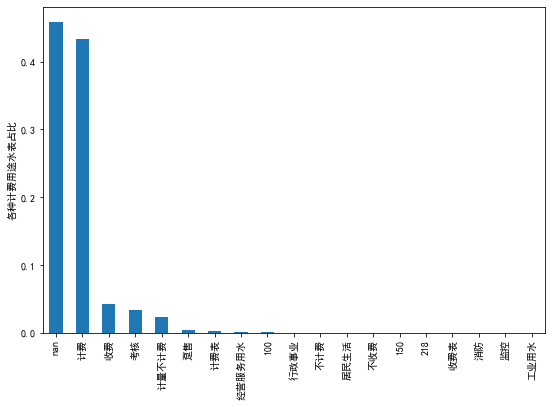

In [26]:

large_metre_2020['用途'].value_counts(dropna=False,normalize=1).plot.bar(figsize=(9,6))
plt.ylabel('各种计费用途水表占比')


In [27]:
large_metre_2020[large_metre_2020['用途'].isin(['计费','收费'])]['区册号'].value_counts(dropna=False,normalize=1)

NaN           0.078418
4047012010    0.025403
4057012010    0.022531
2018092010    0.021648
06A620010     0.018555
                ...   
3065031700    0.000221
3034011900    0.000221
3085041700    0.000221
1062091500    0.000221
04G317000     0.000221
Name: 区册号, Length: 715, dtype: float64

In [28]:
large_metre_list = pd.read_csv(r'./自来水数据/远传表原始数据/营抄系统的大表清单卢部提取remote_meter_user_info_20200213_202002171625.csv',encoding = 'gbk')
smart_metre_list = pd.read_csv(r'./自来水数据/远传表原始数据/营抄系统的小表清单卢部提取smart_meter_user_info_20200213_202002171625.csv',encoding = 'gb18030')

In [29]:
large_metre_list.head()

,Unnamed: 0,user_no,user_name,mr_sect_no,trade_sort,use_type_code,meter_calibre,user_ms_type
0,6610803,6610803,广州合景房地产开发有限公司,2058032010,公共消防,消防环卫绿化,100.0,计费
1,9830341,9830341,水沥村委会,4027012010,农村/城中村总表民用,居民生活,100.0,计费
2,289186,289186,广州市荔湾区詹天佑小学,1063062010,学校用水,学校用水,100.0,计费
3,6610799,6610799,广州合景房地产开发有限公司,2058032010,公共绿化,消防环卫绿化,100.0,计费
4,6935102,6935102,东山钢瓶厂,1061112010,混合商业,经营服务用水,NaN,计费


In [30]:
smart_metre_list.head()

,user_no,user_no.1,user_name,mr_sect_no,trade_sort,use_type_code,meter_calibre,user_ms_type
0,6618924,6618924,陈皓维,1063290311,抄表到户居民家庭,居民生活,15.0,计费
1,6618937,6618937,梁美好,1063290311,抄表到户居民家庭,居民生活,15.0,计费
2,6619363,6619363,黄庆璋,1063290311,抄表到户居民家庭,居民生活,20.0,计费
3,1832932,1832932,曲雄生,1061110211,抄表到户居民家庭,居民生活,20.0,计费
4,1832945,1832945,陈志明,1061110211,抄表到户居民家庭,居民生活,20.0,计费


**修正清单用户编号格式**

In [31]:
large_metre_list['user_no'] = large_metre_list['user_no'].astype('str').str.pad(10,fillchar='0')
smart_metre_list['user_no'] = smart_metre_list['user_no'].astype('str').str.pad(10,fillchar='0')

In [32]:
print(large_metre_list.info())
smart_metre_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 8 columns):
Unnamed: 0       8597 non-null int64
user_no          8597 non-null object
user_name        8597 non-null object
mr_sect_no       8597 non-null object
trade_sort       8597 non-null object
use_type_code    8597 non-null object
meter_calibre    7590 non-null float64
user_ms_type     8594 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 537.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129721 entries, 0 to 129720
Data columns (total 8 columns):
user_no          129721 non-null object
user_no.1        129721 non-null int64
user_name        129721 non-null object
mr_sect_no       129721 non-null int64
trade_sort       129721 non-null object
use_type_code    129721 non-null object
meter_calibre    129693 non-null float64
user_ms_type     129717 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 7.9+ MB


In [33]:
smart_metre_list['user_ms_type'].value_counts(dropna=False)

计费     129698
考核         19
NaN         4
Name: user_ms_type, dtype: int64

**获取远传大表不一致的编号**

In [34]:
len(set(large_metre_2020['用户编号'])&set(large_metre_list['user_no']))

7471

In [35]:
len(set(large_metre_list['user_no'])-set(large_metre_2020['用户编号']))

1126

In [36]:
len(set(large_metre_2020['用户编号'])-set(large_metre_list['user_no']))

2061

In [37]:
large_metre_2020_inner = pd.merge(large_metre_2020,large_metre_list,left_on='用户编号', right_on='user_no')

In [38]:
large_metre_2020_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7471 entries, 0 to 7470
Data columns (total 73 columns):
远传ID             7471 non-null object
数据编号             7471 non-null float64
区册号              6489 non-null object
用户编号             7471 non-null object
用户名称             7471 non-null object
用途               4063 non-null object
性质               4060 non-null object
口径               7227 non-null object
数据编号.1           7471 non-null float64
2020-01-01       6303 non-null float64
2020-01-02       6069 non-null float64
2020-01-03       6655 non-null float64
2020-01-04       6823 non-null float64
2020-01-05       6861 non-null float64
2020-01-06       7037 non-null float64
2020-01-07       7038 non-null float64
2020-01-08       7036 non-null float64
2020-01-09       7045 non-null float64
2020-01-10       7043 non-null float64
2020-01-11       7041 non-null float64
2020-01-12       7035 non-null float64
2020-01-13       7048 non-null float64
2020-01-14       7054 non-null float64
202

In [39]:
large_metre_2020_inner=large_metre_2020_inner[['远传ID', '数据编号', '区册号','mr_sect_no', '用户编号','用户名称', 'user_name','用途','user_ms_type',
                        '性质','trade_sort','use_type_code', '口径', 'meter_calibre',
                        '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                         '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
                         '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                         '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
                         '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
                         '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
                         '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '合计' ]]


large_metre_2020_inner = large_metre_2020_inner[large_metre_2020_inner['user_ms_type']=='计费']

In [40]:
large_metre_2020_inner['user_ms_type'].value_counts()

计费    7460
Name: user_ms_type, dtype: int64

In [41]:
large_metre_list[large_metre_list['user_no'].isin(list(set(large_metre_list['user_no'])-set(large_metre_2020['用户编号'])))].query("user_ms_type=='计费'")

,Unnamed: 0,user_no,user_name,mr_sect_no,trade_sort,use_type_code,meter_calibre,user_ms_type
4,6935102,0006935102,东山钢瓶厂,1061112010,混合商业,经营服务用水,NaN,计费
5,6935030,0006935030,三茂铁路公司办公室,1061192010,水疗馆,特种用水,NaN,计费
6,6618676,0006618676,黄仁强,1063042010,居民（旧）,居民生活,15.0,计费
7,6619318,0006619318,王爱兰（低保）,1063212010,居民（旧）,居民生活,15.0,计费
8,6619334,0006619334,黄腾开（低保）,1063212010,低保户（旧）,居民生活,15.0,计费
...,...,...,...,...,...,...,...,...
8591,37356095,0037356095,华南理工大学,3054012010,商业,经营服务用水,NaN,计费
8592,37354099,0037354099,华南理工大学,3054012010,商业,经营服务用水,NaN,计费
8594,37217121,0037217121,姚甜瑞,1021042010,居民家庭,居民生活,NaN,计费
8595,37489104,0037489104,谭炳强（低保）,1063412010,居民家庭,居民生活,15.0,计费


在远传系统中不在营抄系统中的远传大表的用户编号清单

In [ ]:
large_metre_2020[large_metre_2020['用户编号'].\
                 isin(list(set(large_metre_2020['用户编号'])&set(large_metre_list['user_no'])))][:-1].\
to_csv('./数据导出/远传大表用户（同时在远传系统中和营抄系统中）.csv')

In [ ]:
large_metre_2020[large_metre_2020['用户编号'].\
                 isin(list(set(large_metre_2020['用户编号'])-set(large_metre_list['user_no'])))][:-1].\
to_csv('./数据导出/远传大表用户（在远传系统中不在营抄系统中）.csv')

In [ ]:
large_metre_list[large_metre_list['user_no'].isin(list(set(large_metre_list['user_no'])-set(large_metre_2020['用户编号'])))].\
to_csv('./数据导出/远传大表用户（在营抄系统中不在远传系统中）.csv')

**获取远传小表不一致的清单**

In [ ]:
len(set(smart_metre_2020['用户编号'])&set(smart_metre_list['user_no']))

In [ ]:
len(set(smart_metre_2020['用户编号'])-set(smart_metre_list['user_no']))

In [ ]:
len(set(smart_metre_list['user_no'])-set(smart_metre_2020['用户编号']))

In [ ]:
smart_metre_2020_inner = pd.merge(smart_metre_2020,smart_metre_list,left_on='用户编号', right_on='user_no')

In [ ]:
smart_metre_2020_inner.info()

In [ ]:
smart_metre_2020_inner = smart_metre_2020_inner[['远传ID', '数据编号', '区册号','mr_sect_no', '用户编号','用户名称', 'user_name','用途','user_ms_type',
                        '性质','trade_sort','use_type_code', '口径', 'meter_calibre',
                        '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                         '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
                         '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                         '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
                         '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
                         '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
                         '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '合计' ]]




In [ ]:
smart_metre_2020_inner['user_ms_type'].value_counts()

In [ ]:
smart_metre_list[smart_metre_list['user_no'].isin(list(set(smart_metre_list['user_no'])-set(smart_metre_2020['用户编号'])))].query("user_ms_type=='计费'")

In [ ]:
smart_metre_2020[smart_metre_2020['用户编号'].isin(list(set(smart_metre_2020['用户编号'])&set(smart_metre_list['user_no'])))][:-1].\
to_csv('./数据导出/远传小表用户(同时在远传系统和营抄系统中).csv')

在远传系统中不在营抄系统中的远传小表的用户编号清单

In [ ]:
smart_metre_2020[smart_metre_2020['用户编号'].isin(list(set(smart_metre_2020['用户编号'])-set(smart_metre_list['user_no'])))][:-1].\
to_csv('./数据导出/远传小表用户（在远传系统中不在营抄系统中）.csv')

在营抄系统中不在远传系统中的小表用户编号清单

In [ ]:
smart_metre_list[smart_metre_list['user_no'].isin(list(set(smart_metre_list['user_no'])-set(smart_metre_2020['用户编号'])))].\
to_csv('./数据导出/远传小表用户（在营抄系统中不在远传系统中）.csv')

**配对数据的读表质量**

In [ ]:
(large_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].notnull().sum(axis=1)/55).value_counts()

In [ ]:
(smart_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].notnull().sum(axis=1)/55).value_counts()

Text(0.5, 1.0, '大表')

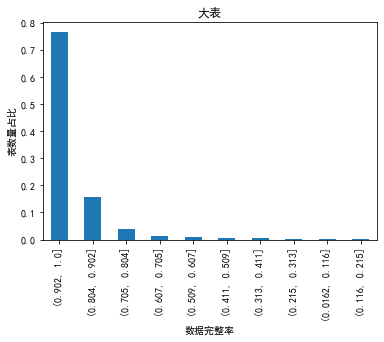

In [42]:

(large_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].notnull().sum(axis=1)/55).value_counts(bins=10,normalize=1).plot(kind='bar')
plt.xlabel('数据完整率')
plt.ylabel('表数量占比')

plt.title('大表')

Text(0.5, 1.0, '小表')

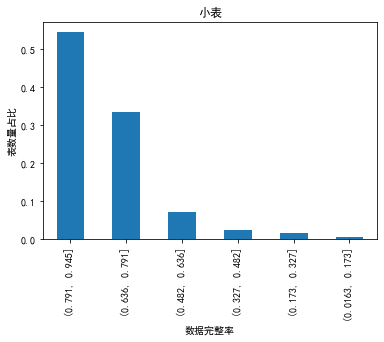

In [312]:
(smart_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].notnull().sum(axis=1)/55).value_counts(bins=6,normalize=1).plot(kind='bar')
plt.xlabel('数据完整率')
plt.ylabel('表数量占比')

plt.title('小表')

In [316]:
all_metre_2020 = large_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].append(smart_metre_2020_inner.set_index('用户编号').iloc[:,13:-1])

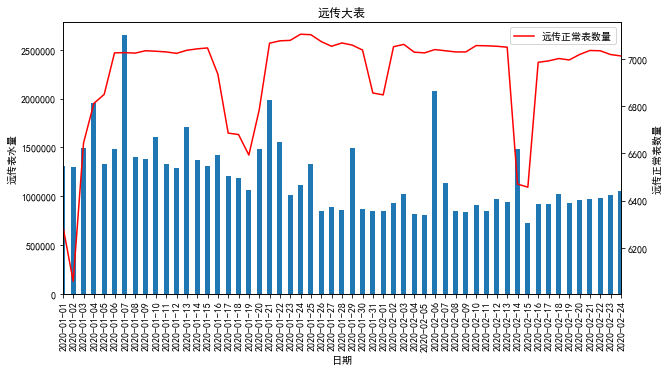

In [354]:
# 画图
fig, ax1 = plt.subplots(figsize = (10, 5))

# 左轴
large_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].sum().plot(kind='bar',ax=ax1)
ax1.set_xlabel('日期')
ax1.set_ylabel('远传表水量')
plt.title("远传大表")
# 右轴
ax2 = ax1.twinx()
large_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].count().plot(color='r',label='远传正常表数量',ax=ax2)
ax2.set_ylabel('远传正常表数量')
plt.legend(loc='upper right')

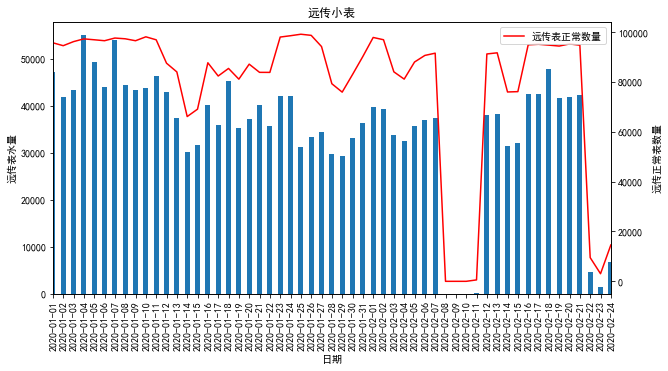

In [355]:
# 画图
fig, ax1 = plt.subplots(figsize = (10, 5))

# 左轴
smart_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].sum().plot(kind='bar',ax=ax1)
ax1.set_xlabel('日期')
ax1.set_ylabel('远传表水量')
plt.title("远传小表")
# 右轴
ax2 = ax1.twinx()
smart_metre_2020_inner.set_index('用户编号').iloc[:,13:-1].count().plot(color='r',label='远传表正常数量',ax=ax2)
ax2.set_ylabel('远传正常表数量')
plt.legend(loc='upper right')

In [322]:
all_metre_2020.count()

2020-01-01    101922
2020-01-02    100521
2020-01-03    102737
2020-01-04    104009
2020-01-05    103687
2020-01-06    103480
2020-01-07    104555
2020-01-08    104258
2020-01-09    103484
2020-01-10    105052
2020-01-11    103849
2020-01-12     94469
2020-01-13     90978
2020-01-14     73096
2020-01-15     76063
2020-01-16     94550
2020-01-17     88991
2020-01-18     92025
2020-01-19     87639
2020-01-20     93843
2020-01-21     90843
2020-01-22     90836
2020-01-23    105003
2020-01-24    105563
2020-01-25    106160
2020-01-26    105681
2020-01-27    101171
2020-01-28     86275
2020-01-29     82903
2020-01-30     89938
2020-01-31     96996
2020-02-01    104611
2020-02-02    103899
2020-02-03     91039
2020-02-04     88094
2020-02-05     94936
2020-02-06     97599
2020-02-07     98497
2020-02-08      7030
2020-02-09      7030
2020-02-10      7057
2020-02-11      7624
2020-02-12     98200
2020-02-13     98655
2020-02-14     82376
2020-02-15     82499
2020-02-16    101803
2020-02-17   

In [80]:
smart_metre_2020['用途'].astype('str').value_counts(dropna=False)

nan    117265
计费         90
Name: 用途, dtype: int64

([<matplotlib.patches.Wedge at 0x214d4d5a5c8>,
 [Text(-1.1999965169027873, 0.0028912663624417368, 'nan'),
  Text(1.0999968069185582, -0.00265042807423051, '计费')],
 [Text(-0.6999979681932925, 0.0016865720447576797, '99.92%'),
  Text(0.5999982583192135, -0.0014456880404893691, '0.08%')])

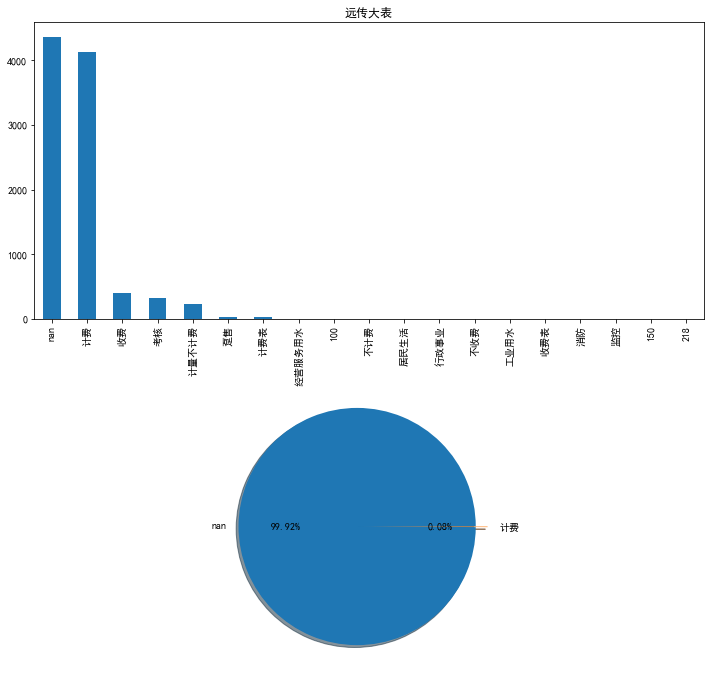

In [96]:
fig = plt.figure(figsize=(12,12))
# fig.suptitle("标题")
plt.subplot(2,1,1)
large_metre_2020['用途'].astype('str').value_counts(dropna=False).plot(kind='bar',title='远传大表')
plt.subplot(2,1,2)
plt.pie(smart_metre_2020['用途'].astype('str').value_counts(dropna=False).values,
        labels=smart_metre_2020['用途'].astype('str').value_counts(dropna=False).index,autopct="%.2f%%",explode=[0.1,0],shadow=1)

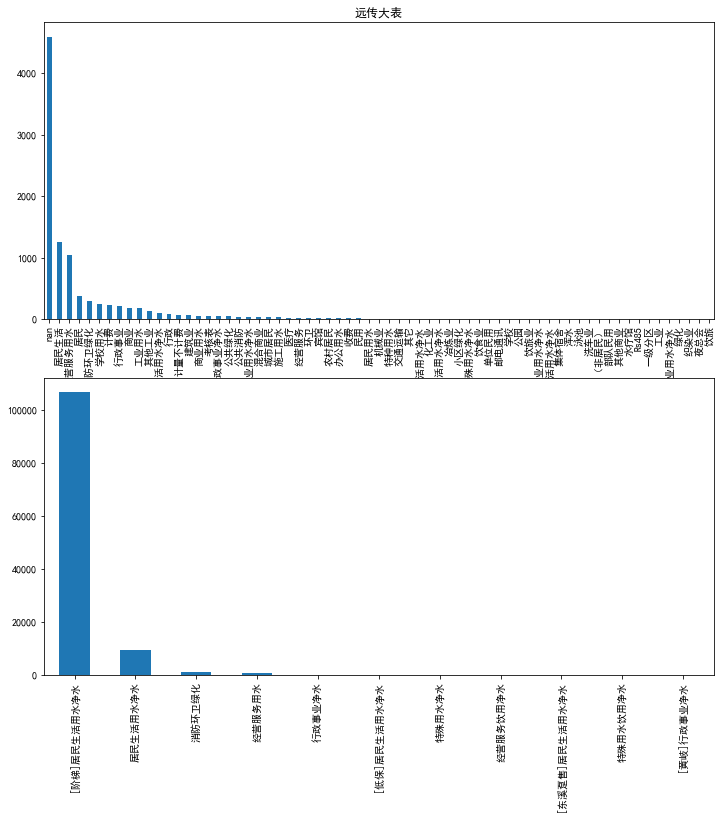

In [110]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
large_metre_2020['性质'].astype('str').value_counts(dropna=False).plot(kind='bar',title='远传大表')
plt.subplot(2,1,2)
smart_metre_2020['性质'].astype('str').value_counts(dropna=False).plot(kind='bar')

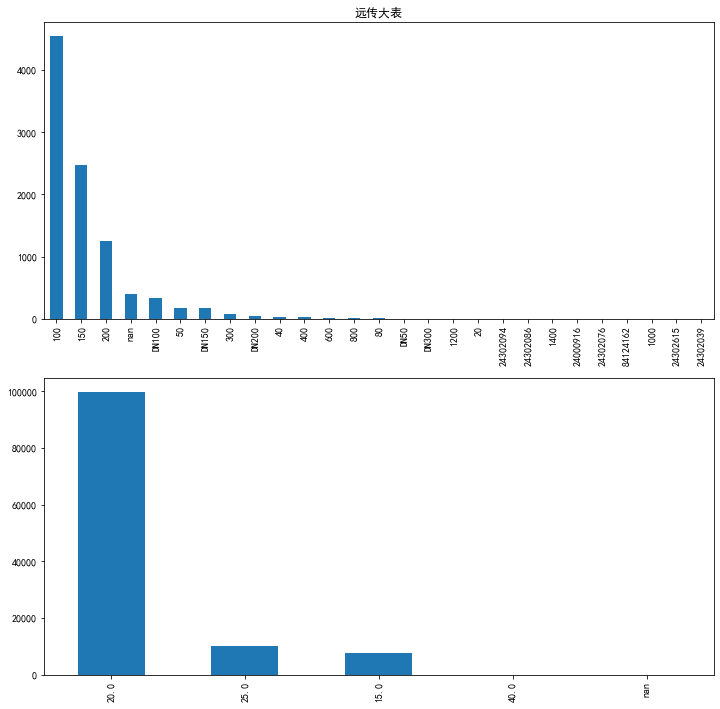

In [109]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
large_metre_2020['口径'].astype('str').value_counts(dropna=False).plot(kind='bar',title='远传大表')
plt.subplot(2,1,2)
smart_metre_2020['口径'].astype('str').value_counts(dropna=False).plot(kind='bar')

## 2019远传表有效天数分布##

In [8]:
meter = pd.read_excel(
    r"e:\专题工作（重要）\公司级大数据系统资料\战略与大数据分析系统项目\远传表数据治理\远传表相关字段情况.xlsx",
    sheet_name=1,
    index_col=0)

In [9]:
meter

,远传编号,2019年有数据天数,有数据天数比例
1,6030000,1,0.00274
2,11120000,1,0.00274
3,13600000,1,0.00274
4,27020000,1,0.00274
5,29600000,1,0.00274
...,...,...,...
194136,71420302741,365,1.00000
194137,71420302758,365,1.00000
194138,71420302839,365,1.00000
194139,71420302921,365,1.00000


In [33]:
hist_data = pd.cut(meter['有数据天数比例'],right=0,include_lowest=1,bins=[0, 0.1, 0.5, 0.99,1,1.01],labels=['10%以下','10%~50%','50%~99%','99%以上','100%'])

In [37]:
hist_data.value_counts(sort=0)

10%以下       14607
10%~50%     16233
50%~99%     49538
99%以上      112376
100%         1386
Name: 有数据天数比例, dtype: int64

Text(0, 0.5, '远传表只数')

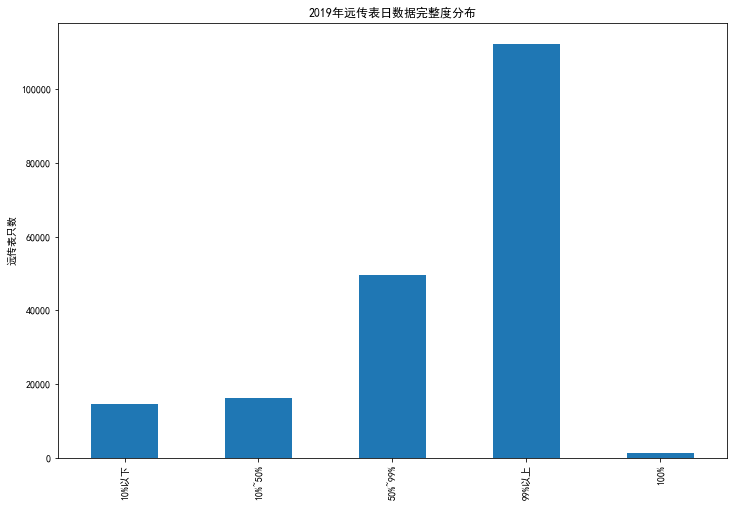

In [41]:
hist_data.value_counts(sort=0).plot(kind='bar',figsize=(12,8),title='2019年远传表日数据完整度分布')
plt.ylabel('远传表只数')